![image](./images/pandas.png)

Pandas est le package de prédilection pour traiter des données structurées.

Pandas est basé sur 2 structures extrêmement liées les Series et le DataFrame.

Ces deux structures permettent de traiter des données sous forme de tableaux indexés.

Les classes de Pandas utilisent des classes de Numpy, il est donc possible d'utiliser les fonctions universelles de Numpy sur les objets Pandas.

In [1]:
# on importe pandas avec :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Les Series de Pandas

- Les Series sont indexées, c'est leur avantage sur les arrays de NumPy
- On peut utiliser les fonctions `.values` et `.index` pour voir les différentes parties de chaque Series
- On définit une Series par `pd.Series([,], index=['','',])`
- On peut appeler un élément avec `ma_serie['France']`
- On peut aussi faire des conditions :
```python
ma_serie[ma_serie>5000000]
```
```
'France' in ma_serie
```
- Les objets Series peuvent être transformés en dictionnaires en utilisant :
`.to_dict()`

**Exercice :**
    
Définir un objet Series comprenant la population de 5 pays puis afficher les pays ayant une population > 50’000’000.


In [2]:
serie_pop = pd.Series(data=[70,8,300,1200] , index=["France","Suisse","USA",'Chine'] )

In [3]:
serie_pop

France      70
Suisse       8
USA        300
Chine     1200
dtype: int64

In [4]:
# on affiche un élément comme dans un dictionnaire
serie_pop["France"]

70

In [5]:
# on affiche un élément comme dans une liste
serie_pop.iloc[0]

70

In [6]:
serie_pop_50 = serie_pop[serie_pop>50]

In [7]:
serie_pop_50

France      70
USA        300
Chine     1200
dtype: int64

# D'autres opérations sur les objets series

- Pour définir le nom de la Series, on utilise `.name`
- Pour définir le titre de la colonne des observations, on utilise `.index.name`

**Exercice :**
    
Définir les noms de l’objet et de la colonne des pays pour la Series précédente


In [8]:
serie_pop.name="Populations"
serie_pop.index.name = "Pays"
print(serie_pop)

Pays
France      70
Suisse       8
USA        300
Chine     1200
Name: Populations, dtype: int64


# Les données manquantes

Dans pandas, les données manquantes sont identifiés avec les fonctions de Numpy (`np.nan`). On a d'autres fonctions telles que :

In [9]:
pd.Series([2,np.nan,4],index=['a','b','c']).mean()

3.0

In [10]:
pd.isna(pd.Series([2,np.nan,4,np.nan],index=['a','b','c','d'])).sum()

2

In [11]:
pd.notna(pd.Series([2,np.nan,4],index=['a','b','c']))

a     True
b    False
c     True
dtype: bool

# Les dates avec pandas

- Python possède un module datetime qui permet de gérer facilement des dates
- Pandas permet d'appliquer les opérations sur les dates aux Series et aux DataFrame
- Le format es dates Python est `YYYY-MM-DD HH:MM:SS`

- On peut générer des dates avec la fonction `pd.date_range()` avec différente fréquences `freq=`
- On peut utiliser ces dates comme index dans un DataFrame ou dans un objet Series
- On peut changer la fréquence en utilisant `.asfreq()`
- Pour transformer une chaine de caractère en date, on utilise `pd.to_datetime()` avec l’option `dayfirst=True` si on est dans le cas français
-On pourra aussi spécifier un format pour accélérer le processus `%Y%m%d`

**Exercice :**

Créez un objet Series et ajoutez des dates partant du 3 octobre 2017 par jour jusqu’à aujourd’hui. Afficher le résultat dans un graphique (on utilisera la méthode `.plot()`

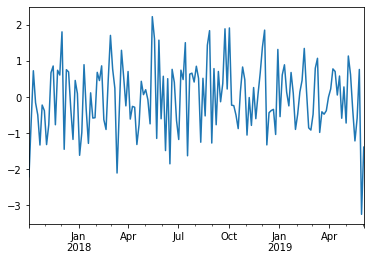

In [12]:
# générer des dates entre le 3/10/2017 et aujourd'hui
dates = pd.date_range("2017-10-03",pd.datetime.today(),freq="4 d")

serie_action = pd.Series(np.random.randn(len(dates)),index=dates)
serie_action.plot()

# Aller plus loin avec les dates

- On peut définir avec pandas des fuseaux horaires
    - On utilise `.tz_localize("Europe/Paris")`
    - On peut changer de fuseau horaire avec `.tz_convert()`

- On peut aussi travailler sur des périodes plutôt que sur des dates
    - On utilise `pd.period_range()`


**Exercice :** 
    
Créez un objet Series avec des résultats par heures à partir d'hier.


In [13]:
heures = pd.period_range(pd.datetime.today()- pd.Timedelta("1 day"),pd.datetime.today(),freq="h")

In [14]:
serie_heures = pd.Series(np.random.random(heures.shape[0]),index=heures)

In [15]:
serie_heures

2019-06-05 17:00    0.101425
2019-06-05 18:00    0.872131
2019-06-05 19:00    0.178373
2019-06-05 20:00    0.446305
2019-06-05 21:00    0.716820
2019-06-05 22:00    0.728524
2019-06-05 23:00    0.986412
2019-06-06 00:00    0.639226
2019-06-06 01:00    0.055516
2019-06-06 02:00    0.191278
2019-06-06 03:00    0.789839
2019-06-06 04:00    0.595668
2019-06-06 05:00    0.318489
2019-06-06 06:00    0.463253
2019-06-06 07:00    0.697802
2019-06-06 08:00    0.418972
2019-06-06 09:00    0.329633
2019-06-06 10:00    0.589489
2019-06-06 11:00    0.183262
2019-06-06 12:00    0.920115
2019-06-06 13:00    0.367818
2019-06-06 14:00    0.226201
2019-06-06 15:00    0.166035
2019-06-06 16:00    0.317121
2019-06-06 17:00    0.700816
Freq: H, dtype: float64

# Le DataFrame 

- Les DataFrame sont des objets très souples pouvant être construits de différentes façon
- On peut les construire en récupérant des données copier / coller, où directement sur Internet, ou en entrant les valeurs manuellement


- Les DataFrame se rapprochent des dictionnaires et on peut construire ces objets en utilisant `DataFrame(dico)`
- De nombreux détails sur la création des DataFrame se trouve sur ce site :

<http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html>


# Construction de DataFrame

On peut simplement construire un DataFrame avec le classe pd.DataFrame() à partir de différentes structures :

In [16]:
n_row = 100
n_col = 10
frame1=pd.DataFrame(np.random.randn(n_row*n_col).reshape(n_row,n_col),
             index=["obs_"+str(i) for i in range(n_row)],
             columns=["col_"+str(i) for i in range(n_col)])
frame1

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9
obs_0,-1.867980,1.142836,-0.010939,-0.601909,-0.110922,1.078163,0.869306,-0.037188,0.937039,-0.786150
obs_1,1.581621,-0.511261,0.202058,2.475151,0.208395,-1.421816,-0.402198,2.436960,-0.268739,0.092097
obs_2,0.994759,1.026179,-0.068737,1.767920,2.179358,-1.020845,0.520061,0.982683,0.102152,1.942288
obs_3,1.038377,-0.080419,-0.200767,-0.204170,0.763735,-0.941771,-0.497651,-0.293138,-0.939417,1.768510
obs_4,0.011607,-0.802806,-1.810095,-2.057343,0.416766,-0.219650,0.886992,0.484415,-1.505226,1.144960
obs_5,-0.942030,-0.176302,0.646240,2.034588,-1.468419,0.958480,-0.299286,0.408970,-0.008780,0.029415
obs_6,-0.738843,-0.808394,-0.915511,-0.523694,0.048464,0.556908,0.269650,-0.112947,1.186376,0.704638
obs_7,-0.927544,2.147835,-0.638136,0.212698,0.288087,1.173710,-1.303735,-0.082753,1.357599,1.041639
obs_8,0.011320,0.418530,-2.449666,-0.038007,0.002629,2.211552,0.766881,0.832515,-0.521876,0.354037
obs_9,-0.101096,0.206662,-0.000797,2.404195,0.776680,-0.475122,0.095264,-1.051117,-1.199831,0.514022


In [17]:
frame1.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9
obs_0,-1.867980,1.142836,-0.010939,-0.601909,-0.110922,1.078163,0.869306,-0.037188,0.937039,-0.786150
obs_1,1.581621,-0.511261,0.202058,2.475151,0.208395,-1.421816,-0.402198,2.436960,-0.268739,0.092097
obs_2,0.994759,1.026179,-0.068737,1.767920,2.179358,-1.020845,0.520061,0.982683,0.102152,1.942288
obs_3,1.038377,-0.080419,-0.200767,-0.204170,0.763735,-0.941771,-0.497651,-0.293138,-0.939417,1.768510
obs_4,0.011607,-0.802806,-1.810095,-2.057343,0.416766,-0.219650,0.886992,0.484415,-1.505226,1.144960


In [18]:
frame1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, obs_0 to obs_99
Data columns (total 10 columns):
col_0    100 non-null float64
col_1    100 non-null float64
col_2    100 non-null float64
col_3    100 non-null float64
col_4    100 non-null float64
col_5    100 non-null float64
col_6    100 non-null float64
col_7    100 non-null float64
col_8    100 non-null float64
col_9    100 non-null float64
dtypes: float64(10)
memory usage: 8.6+ KB


# Opérations sur les DataFrame

On peut afficher le nom des colonnes :

In [19]:
print(frame1.columns)

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9'],
      dtype='object')


On peut accéder à une colonne avec :
- `frame1.col_0` : attention au cas de nom de colonnes avec des espaces...
- `frame1['col_0']`

On peut accéder à une cellule avec :
- `frame1.loc['obs1','col_0']` : on utilise les index et le nom des colonnes
- `frame1.iloc[1,0]` : on utilise les positions dans le DataFrame


# Options de visualisation et de résumé

Pour afficher les 3 premières lignes, on peut utiliser :


In [20]:
frame1.head(3)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9
obs_0,-1.867980,1.142836,-0.010939,-0.601909,-0.110922,1.078163,0.869306,-0.037188,0.937039,-0.786150
obs_1,1.581621,-0.511261,0.202058,2.475151,0.208395,-1.421816,-0.402198,2.436960,-0.268739,0.092097
obs_2,0.994759,1.026179,-0.068737,1.767920,2.179358,-1.020845,0.520061,0.982683,0.102152,1.942288


Pour afficher un résumé du DF :

In [21]:
frame1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, obs_0 to obs_99
Data columns (total 10 columns):
col_0    100 non-null float64
col_1    100 non-null float64
col_2    100 non-null float64
col_3    100 non-null float64
col_4    100 non-null float64
col_5    100 non-null float64
col_6    100 non-null float64
col_7    100 non-null float64
col_8    100 non-null float64
col_9    100 non-null float64
dtypes: float64(10)
memory usage: 8.6+ KB


# Importer des données externes

Pandas est l'outil le plus efficace pour importer des données externes, il prend en charge de nombreux formats dont csv, Excel, SQL, SAS...


## Importation de données avec Pandas

Quel que soit le type de fichier, Pandas possède une fonction :
```python
frame=pd.read_...('chemin_du_fichier/nom_du_fichier',...)
```
Pour écrire un DataFrame dans un fichier, on utilise :
```python
frame.to_...('chemin_du_fichier/nom_du_fichier',...)
```

**Exercice :**
    
Importer un fichier `.csv` avec `pd.read_csv()`. On utilisera le fichier "./data/airbnb.csv"

In [22]:
airbnb = pd.read_csv("https://www.stat4decision.com/airbnb.csv")

C:\Users\s4d-asus-14\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
airbnb.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [24]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59126 entries, 0 to 59125
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 47.8+ MB


In [25]:
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20190507030954,2019-05-07,zen and calm,Appartement très calme de 50M2 Utilisation de ...,I bedroom appartment in Paris 14,I bedroom appartment in Paris 14 Good restaura...,none,Good restaurants very close the Montparnasse S...,...,f,f,flexible,f,f,1,1,0,0,0.28
1,5396,https://www.airbnb.com/rooms/5396,20190507030954,2019-05-08,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","Small, well appointed studio apartment at the ...","Cozy, well-appointed and graciously designed s...",none,"You are within walking distance to the Louvre,...",...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,1.44
2,7397,https://www.airbnb.com/rooms/7397,20190507030954,2019-05-07,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",PLEASE ASK ME BEFORE TO MAKE A REQUEST !!! No ...,"VERY CONVENIENT, WITH THE BEST LOCATION ! PLEA...",none,NaN,...,f,f,moderate,f,f,1,1,0,0,2.47
3,8522,https://www.airbnb.com/rooms/8522,20190507030954,2019-05-08,GREAT FLAT w/ CITY VIEW,NaN,Really nice flat located in the 20th district ...,Really nice flat located in the 20th district ...,none,NaN,...,f,f,moderate,f,f,1,1,0,0,0.01
4,9359,https://www.airbnb.com/rooms/9359,20190507030954,2019-05-07,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,"Since I live in the USA, it is difficult to ma...",Location! Location! Location! Just bring your ...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,NaN


In [26]:
# on affiche la seconde ligne
airbnb.iloc[2]

id                                                                                           7397
listing_url                                                     https://www.airbnb.com/rooms/7397
scrape_id                                                                          20190507030954
last_scraped                                                                           2019-05-07
name                                                             MARAIS - 2ROOMS APT - 2/4 PEOPLE
summary                                                 VERY CONVENIENT, WITH THE BEST LOCATION !
space                                           PLEASE ASK ME BEFORE TO MAKE A REQUEST !!! No ...
description                                     VERY CONVENIENT, WITH THE BEST LOCATION ! PLEA...
experiences_offered                                                                          none
neighborhood_overview                                                                         NaN
notes               

# D'autres types de données

## JSON
Les objets JSON ressemblent à des dictionnaires.

On utilise le module `json` puis la fonction `json.loads()` pour transformer une entrée JSON en objet json

## HTML
On utilise `pd.read_html(url)`. Cet fonction est basée sur les packages `beautifulsoup` et `html5lib`

Cette fonction renvoie une liste de DataFrame qui représentent tous les DataFrame de la page. On ira ensuite chercher l'élément qui nous intéresse avec `frame_list[0]`

**Exercice :**
    
Importez un tableau en html depuis la page <http://www.fdic.gov/bank/individual/failed/banklist.html>

In [27]:
bank = pd.read_html("https://www.fdic.gov/bank/individual/failed/banklist.html")

In [28]:
type(bank)

list

In [29]:
frame_bank = bank[0]

In [30]:
# on compte les occurences des états
frame_bank["ST"].value_counts()

GA    93
FL    75
IL    69
CA    41
MN    23
WA    19
MO    16
AZ    16
MI    14
TX    13
NV    12
WI    11
MD    10
KS    10
CO    10
PA    10
SC    10
OH     8
UT     8
NJ     7
TN     7
NC     7
OK     7
AL     7
OR     6
NY     5
VA     5
PR     4
AR     4
LA     4
NM     3
IN     3
NE     3
CT     2
KY     2
MS     2
IA     2
ID     2
NH     1
HI     1
MA     1
SD     1
WY     1
WV     1
Name: ST, dtype: int64

In [31]:
frame_bank["City"].value_counts()

Chicago            20
Atlanta            10
Phoenix             6
Naples              5
Scottsdale          4
Miami               4
Los Angeles         4
Alpharetta          4
Las Vegas           4
Bradenton           4
Milwaukee           3
Stockbridge         3
Henderson           3
Springfield         3
Birmingham          3
Tampa               3
Asheville           3
Sarasota            3
Woodstock           3
Baltimore           3
Kansas City         2
Fort Myers          2
San Diego           2
Orlando             2
Greeley             2
Valdosta            2
Overland Park       2
Franklin            2
Winder              2
Denver              2
                   ..
White Plains        1
Oakland             1
Stamford            1
Oak Forest          1
Lexington           1
Freedom             1
Gordon              1
Blanchardville      1
Oakwood             1
Wyoming             1
Leeton              1
Cocoa Beach         1
Pawleys Island      1
Eldred              1
Merced    

# Importer depuis Excel

On a deux approches pour Excel :
- On peut utiliser `pd.read_excel()`
- On peut utiliser la classe `pd.ExcelFile()`

Dans ce cas, on utilise :
```python
xlsfile=pd.ExcelFile('fichier.xlsx')
xlsfile.parse('Sheet1')
```

**Exercice :** 
    
Importez un fichier Excel avec les deux approches, on utilisera : `credit2.xlsx` et `ville.xls`

In [32]:
credit = pd.read_excel("./data/credit2.xlsx")

In [33]:
credit.head()

,Age,Gender,Marital_Status,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income,Homeowner,Customer_ID
0,40,F,S,11,6,37,56,37073,F,5409
1,47,M,M,13,13,30,56,50721,F,5477
2,35,F,U,1,9,33,57,43578,T,5507
3,45,M,U,15,7,30,62,69553,F,8
4,13,F,S,0,7,27,64,37502,T,158


In [34]:
classeur_excel = pd.ExcelFile("./data/ville.xls")

In [35]:
liste_feuilles = classeur_excel.sheet_names

In [36]:
frame_ville_ain = classeur_excel.parse(liste_feuilles[0])

In [37]:
frame_ville_ain.columns

Index(['NomVille', 'MAJ   ', ' Code Postal ', ' Code INSEE ', 'Code Région',
       ' Latitude ', ' Longitude ', ' Eloignement '],
      dtype='object')

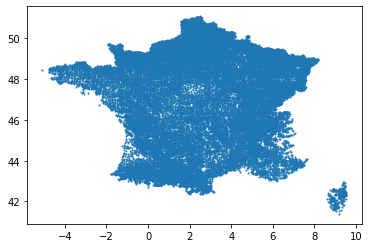

In [38]:
plt.scatter(frame_ville_ain[" Longitude "], frame_ville_ain[" Latitude "], 
            s=1)

In [39]:
frame_ville_ain.to_excel("mon_excel.xlsx")

In [40]:
frame_ville_ain.to_html("mon_dpt.html")

Si on désire écrire dans un classeur Excel existant, on peut utiliser :

In [41]:
with pd.ExcelWriter('mon_excel.xlsx',engine='openpyxl', mode='a') as writer:
    credit.to_excel(writer, sheet_name='Sheet5')

# Importer des données SQL

Pandas possède une fonction `read_sql()` qui permet d’importer directement des bases de données ou des queries dans des DataFrame

Il faut tout de même un connecteur pour accéder aux bases de données

Pour mettre en place ce connecteur, on utlise le package SQLAlchemy.

Suivant le type de base de données, on utilisera différents codes mais la structure du code est toujours la même

In [42]:
# on importe l'outil de connexion
from sqlalchemy import create_engine

On crée une connexion
```python
connexion=create_engine("sqlite:///(...).sqlite")
```

On utlise une des fonctions de Pandas pour charger les données
```python
requete="""select ... from ..."""
frame_sql=pd.read_sql_query(requete,connexion)
```

**Exercices :**
    
Importez la base de données SQLite salaries et récupérez la table Salaries dans un DataFrame 

In [43]:
connexion = create_engine("sqlite:///./data/salaries.sqlite")

In [44]:
connexion.table_names()

['Salaries']

In [45]:
salaries = pd.read_sql_query("select * from Salaries", connexion)

In [46]:
salaries.shape

(148654, 13)

In [47]:
salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,


# Les tris avec Pandas 

Pour effectuer des tris, on utilise :
- `.sort_index()` pour le tri des index
- `.sort_values()` pour le tri des données
- `.rank()` affiche le rang des observations

Il peut y avoir plusieurs tris dans la même opération. Dans ce cas, on utilise des listes de colonnes :
```python
frame.sort_values(["col_1","col_2"])
```

**Exercice :** 
    
Triez les données sur les salaires en se basant sur le BasePay et le JobTitle

In [48]:
# nettoyage des données
salaries["JobTitle_clean"] = salaries["JobTitle"].str.lower()

In [49]:
salaries.sort_values(["JobTitle_clean","BasePay"]).head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,JobTitle_clean
143822,143823,Barbara D Blount,Account Clerk,0,0,10762.2,141.54,10762.22,10903.76,2014,,San Francisco,PT,account clerk
148378,148379,Kenneth Uchida,Account Clerk,0,0,237.5,42.96,237.50,280.46,2014,,San Francisco,PT,account clerk
148626,148627,Paulet Gaines,Account Clerk,0,0,0,0,0.00,0.00,2014,,San Francisco,PT,account clerk
35637,35638,TSE SHIH LENG,ACCOUNT CLERK,614,0,0,,614.00,614.00,2011,,San Francisco,,account clerk
147619,147620,Paul M Hunt,Account Clerk,949.5,0,0,511.78,949.50,1461.28,2014,,San Francisco,PT,account clerk


# Les statistiques simples

Les Dataframe possèdent de nombreuses méthodes pour calculer des statistiques simples :
- `.sum(axis=0)` permet de faire une somme par colonne
- `.sum(axis=1)` permet de faire une somme par ligne
- `.min()` et `.max()` donnent le minimum par colonne
- `.idxmin()` et `.idxmax()` donnent l’index du minimum et du maximum
- `.describe()` affiche un tableau de statistiques descriptives par colonne
- `.corr()` pour calculer la corrélation entre les colonnes

**Exercice :**
    
Obtenir les différentes statistiques descriptives pour les données AirBnB.


In [50]:
salaries["TotalPay"].mean()

74768.321971703

In [51]:
salaries["TotalPay"].median()

71426.60999999999

In [52]:
salaries.corr()

,Id,TotalPay,TotalPayBenefits,Year
Id,1.000000,-0.211478,-0.092190,0.968171
TotalPay,-0.211478,1.000000,0.977313,0.032090
TotalPayBenefits,-0.092190,0.977313,1.000000,0.151947
Year,0.968171,0.032090,0.151947,1.000000


In [53]:
salaries.describe()

,Id,TotalPay,TotalPayBenefits,Year
count,148654.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,74768.321972,93692.554811,2012.522643
std,42912.857795,50517.005274,62793.533483,1.117538
min,1.000000,-618.130000,-618.130000,2011.000000
25%,37164.250000,36168.995000,44065.650000,2012.000000
50%,74327.500000,71426.610000,92404.090000,2013.000000
75%,111490.750000,105839.135000,132876.450000,2014.000000
max,148654.000000,567595.430000,567595.430000,2014.000000


# Le traitement des données manquantes

- Les données manquantes sont identifiées par `NaN`


- `.dropna()` permet de retirer les données manquantes dans un objet Series et l’ensemble d’une ligne dans le cas d’un DataFrame
- Pour éliminer par colonne, on utilise `.dropna(axis=1)`
- Remplacer toutes les données manquantes `.fillna(valeur)`


# Les jointures avec Pandas

On veut joindre des jeux de données en utilisant des clés (variables communes)

- `pd.merge()` permet de joindre deux DataFrame, on utilise comme options `on='key'`

- On peut utiliser comme option `how=`, on peut avoir :
    - `left` dans ce cas, on garde le jeu de données à gauche et pour les données de droite des valeurs manquantes sont ajoutées.
    - `outer`, on garde toutes les valeurs des deux jeux de données
    - ...

- On peut avoir plusieurs clés et faire une jointure sur les deux clés `on=['key1','key2']`

Pour plus de détails : <http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.merge.html>


**Exercice :**
    
Joindre deux dataframes (credit1 et credit2).


In [54]:
credit1 = pd.read_csv("./data/credit1.txt",sep='\t')
credit2 = pd.read_excel("./data/credit2.xlsx")

In [55]:
credit1.columns

Index(['Months_as_a_Customer', 'Number_of_Products', 'RFM_Score',
       'Average_Balance_Feed_Index', 'Number_of_Transactions',
       'Personal_Debt_to_Equity_Ratio', 'Months_Current_Account',
       'Number_of_Loan_Accounts', 'Customer_ID', 'Has_Bad_Payment_Record',
       'Members_Within_Household', 'Number_of_Call_Center_Contacts',
       'Weeks_Since_Last_Offer', 'Accepted_Personal_Loan',
       'Accepted_Retention', 'Accepted_Home_Equity_Loan',
       'Accepted_Credit_Card', 'Annual_value', 'Interested_in_Personal_Loan',
       'Interested_in_Retention', 'Interested_in_Home_Equity_Loan',
       'Interested_in_Credit_Card'],
      dtype='object')

In [56]:
credit2.columns

Index(['Age', 'Gender', 'Marital_Status', 'Age_Youngest_Child',
       'Number_of_Workers_in_Household', 'Percentage_White_Collar_Workers',
       'Household_Debt_to_Equity_Ratio', 'Income', 'Homeowner', 'Customer_ID'],
      dtype='object')

In [57]:
# jointure entre credit1 et credit2
credit_merge = pd.merge(credit1,credit2,on="Customer_ID")

In [58]:
credit1.join(credit2, on="Customer_ID",rsuffix='cre2').head()

,Months_as_a_Customer,Number_of_Products,RFM_Score,Average_Balance_Feed_Index,Number_of_Transactions,Personal_Debt_to_Equity_Ratio,Months_Current_Account,Number_of_Loan_Accounts,Customer_ID,Has_Bad_Payment_Record,...,Age,Gender,Marital_Status,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income,Homeowner,Customer_IDcre2
0,24,3,10,229,2,40,13,0,5409,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,2,12,8,1,47,5,2,5477,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36,0,0,0,0,35,31,0,5507,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0,0,0,45,-3,0,8,0,...,26.0,M,S,0.0,15.0,31.0,52.0,42752.0,F,5695.0
4,48,0,0,0,0,13,39,0,158,0,...,49.0,F,M,21.0,8.0,41.0,50.0,42003.0,F,14436.0


In [59]:
credit_merge.head()

,Months_as_a_Customer,Number_of_Products,RFM_Score,Average_Balance_Feed_Index,Number_of_Transactions,Personal_Debt_to_Equity_Ratio,Months_Current_Account,Number_of_Loan_Accounts,Customer_ID,Has_Bad_Payment_Record,...,Interested_in_Credit_Card,Age,Gender,Marital_Status,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income,Homeowner
0,24,3,10,229,2,40,13,0,5409,0,...,F,40,F,S,11,6,37,56,37073,F
1,12,2,12,8,1,47,5,2,5477,0,...,F,47,M,M,13,13,30,56,50721,F
2,36,0,0,0,0,35,31,0,5507,0,...,F,35,F,U,1,9,33,57,43578,T
3,0,0,0,0,0,45,-3,0,8,0,...,F,45,M,U,15,7,30,62,69553,F
4,48,0,0,0,0,13,39,0,158,0,...,F,13,F,S,0,7,27,64,37502,T


# Gestion des duplications

- On utilise `.duplicated()` ou `.drop_duplicates()` dans le cas où on désire effacer les lignes se répétant


- On peut se concentrer sur une seule variables en entrant directement le nom de la variable. Dans ce cas, c’est la première apparition qui compte. Si on veut prendre la dernière apparition, on utilise l’option `keep="last"`. On pourra avoir :
```python
frame1.drop_duplicates(["col_0","col_1"],keep="last")
```

In [60]:
credit_merge[credit_merge.duplicated("Income",keep=False)==True].sort_values("Income")

,Months_as_a_Customer,Number_of_Products,RFM_Score,Average_Balance_Feed_Index,Number_of_Transactions,Personal_Debt_to_Equity_Ratio,Months_Current_Account,Number_of_Loan_Accounts,Customer_ID,Has_Bad_Payment_Record,...,Interested_in_Credit_Card,Age,Gender,Marital_Status,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income,Homeowner
1963,36,0,0,0,0,23,30,2,70744,0,...,F,23,M,S,0,6,21,71,17418,F
170,36,0,0,0,0,23,34,2,2495,0,...,F,23,M,S,0,6,21,71,17418,F
1080,0,0,0,0,0,34,-6,0,52820,0,...,F,34,M,S,3,20,40,39,21103,T
1075,0,0,0,0,0,33,-5,0,52467,0,...,F,33,M,S,3,20,40,39,21103,F
1426,48,0,0,0,0,31,39,0,68351,0,...,F,31,M,S,3,20,40,39,21103,T
1182,36,3,9,124,2,33,33,0,39160,0,...,F,33,M,S,3,20,40,39,21103,F
244,36,0,0,0,0,34,32,0,6829,0,...,T,34,M,S,3,20,40,39,21103,F
517,0,0,0,0,0,32,-4,0,23379,0,...,F,32,M,S,3,20,40,39,21103,T
1270,24,2,9,69,1,34,16,0,54587,0,...,F,34,M,S,3,20,40,39,21103,F
936,12,0,0,0,0,38,7,0,40138,0,...,F,38,M,S,3,20,40,39,21103,F


# Discrétisation

Pour discrétiser, on utilise la fonction `pd.cut()`, on va définir une liste de points pour discrétiser et on entre cette liste comme second paramètre de la fonction.

Une fois discrétisé, on peut afficher les modalités obtenues en utilisant `.categories`

On peut aussi compter les occurrence en utilisant `pd.value_counts()`

Il est aussi possible d’entrer le nombre de segments comme second paramètre

On utilisera aussi `qcut()`

**Exercice :**
    
Créez une variable dans le dataframe AirBnB pour obtenir des niveaux de prix.


In [61]:
# on crée une colonne prix numérique
airbnb["price_num"]=pd.to_numeric(airbnb["price"].str[1:].str.replace(",",""))

In [62]:
# on discrétise en 5 classes
airbnb["price_disc"]=pd.cut(airbnb["price_num"],5)
airbnb["price_disc2"]=pd.qcut(airbnb["price_num"],5)
airbnb["price_disc3"]=pd.cut(airbnb["price_num"],[0,50,100,1000,10000],labels=["les petits",
                                                                                          "les moyens",
                                                                                          "les grands",
                                                                                          "les très grands"])

In [63]:
airbnb["price_disc"].value_counts()

(-9.379, 1875.8]    59078
(1875.8, 3751.6]       36
(7503.2, 9379.0]        6
(3751.6, 5627.4]        6
(5627.4, 7503.2]        0
Name: price_disc, dtype: int64

In [64]:
airbnb["price_disc2"].value_counts().sort_index()

(-0.001, 53.0]     11933
(53.0, 70.0]       12226
(70.0, 94.0]       11408
(94.0, 140.0]      12338
(140.0, 9379.0]    11221
Name: price_disc2, dtype: int64

In [65]:
airbnb["price_disc3"].value_counts().sort_index()

les petits         11364
les moyens         28888
les grands         18714
les très grands      152
Name: price_disc3, dtype: int64

# Les tableaux croisés avec Pandas

Les DataFrame possèdent des méthodes pour générer des tableaux croisés, notamment :
```python
frame1.pivot_table()
```
Cette méthode permet de gérer de nombreux cas avec des fonctions standards et sur mesure.

**Exercice :**
    
Afficher un tableau Pivot pour les données AirBnB.

In [66]:
airbnb.pivot_table(values="price_num",index="cancellation_policy",
                         columns="room_type",aggfunc="mean")

room_type,Entire home/apt,Private room,Shared room
cancellation_policy,,,
flexible,95.350408,109.948313,73.564220
moderate,104.016005,125.259901,40.887324
strict,63.000000,NaN,NaN
strict_14_with_grace_period,141.510807,92.999418,64.224719
super_strict_30,253.656250,541.363636,NaN
super_strict_60,590.639286,440.000000,NaN


# L'utilisation de GroupBy sur des DataFrame

- `.groupby` permet de rassembler des observations en fonction d’une variable dite de groupe


- Par exemple, `frame.groupby('X').mean()` donnera les moyennes par groupes de `X`


- On peut aussi utiliser `.size()` pour connaître la taille des groupes et utiliser d’autres fonctions (`.sum()`)


- On peut effectuer de nombreuses opérations de traitement avec le groupby


**Exercice :**
    
- Données sur les salaires


- On utilise le `groupby()` pour rassembler les types d’emploi


- Et on calcule des statistiques pour chaque type


On peut utiliser la méthode `.agg()` avec par exemple `'mean'` comme paramètre

On utilise aussi fréquemment la méthode `.apply()` combinée à une fonction lambda

In [67]:
salaries.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status', 'JobTitle_clean'],
      dtype='object')

In [68]:
salaries_group = salaries.groupby("JobTitle_clean")

In [69]:
salaries_group["TotalPay"].mean().sort_values(ascending=False)

JobTitle_clean
general manager-metropolitan transit authority        399211.275000
chief investment officer                              339653.700000
chief, fire department                                325971.683333
chief of police                                       313885.882500
deputy director of investments                        307899.460000
chief of department, (fire department)                302377.730000
gen mgr, public trnsp dept                            297769.413333
asst chf of dept (fire dept)                          281763.483889
deputy chief of department,(fire department)          279359.560000
dep dir for investments, ret                          278592.545000
adm, sfgh medical center                              270047.446667
deputy chief 3                                        268256.512857
assistant deputy chief 2                              267140.253636
controller                                            264750.753333
dept head v                      

In [70]:
frame_stat = salaries_group["TotalPay"].agg(["mean","median","count"]).sort_values("count",ascending=False)

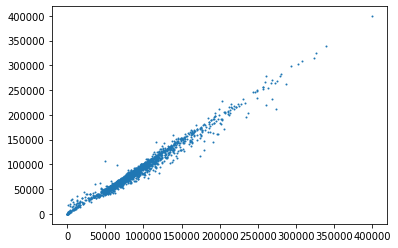

In [71]:
plt.scatter(frame_stat["median"], frame_stat["mean"],s=1)

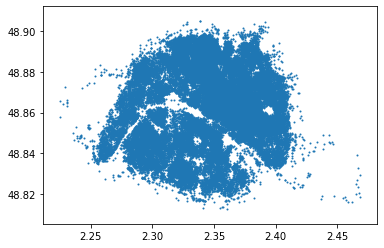

In [72]:
# représenter longitude et latitude
plt.scatter("longitude","latitude",data=airbnb, s=1)

In [73]:
airbnb["price_3"]=pd.to_numeric(airbnb["price"].str.replace("$","")
                             .str.replace(",",""))

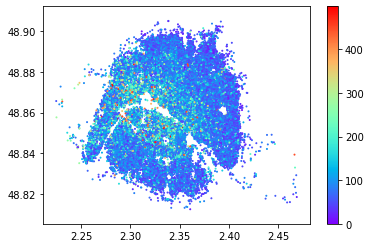

In [75]:
# représenter longitude et latitude
plt.scatter("longitude","latitude",data=airbnb[airbnb["price_3"]<500], s=1, c="price_3",
           cmap = plt.get_cmap("rainbow"))
plt.colorbar()
plt.savefig("paris_airbnb.png")